### Recurrent Neural Network

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Activation, Masking, Dense, LSTM, Dropout
import tensorflow

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
dataset_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/LSTM/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

##### Feature Scaling

In [35]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

##### Creating a data structure with 60 timesteps and 1 output

In [36]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

* Reshaping

In [38]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1198, 60, 1)

#### Building and Training the LSTM

In [57]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.summary()

model.compile(optimizer = 'adam', 
              loss = 'mean_squared_error',
              metrics= ['mae','mse'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_20 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_21 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_21 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_22 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_22 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_23 (LSTM)              (None, 50)               

#### Fitting the RNN to the Training set

In [58]:
model.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
38/38 [==============================] - 14s 145ms/step - loss: 0.0331 - mae: 0.1276 - mse: 0.0331
Epoch 2/50
38/38 [==============================] - 7s 195ms/step - loss: 0.0065 - mae: 0.0608 - mse: 0.0065
Epoch 3/50
38/38 [==============================] - 6s 154ms/step - loss: 0.0051 - mae: 0.0539 - mse: 0.0051
Epoch 4/50
38/38 [==============================] - 5s 130ms/step - loss: 0.0051 - mae: 0.0530 - mse: 0.0051
Epoch 5/50
38/38 [==============================] - 5s 130ms/step - loss: 0.0056 - mae: 0.0563 - mse: 0.0056
Epoch 6/50
38/38 [==============================] - 5s 133ms/step - loss: 0.0047 - mae: 0.0521 - mse: 0.0047
Epoch 7/50
38/38 [==============================] - 5s 129ms/step - loss: 0.0046 - mae: 0.0515 - mse: 0.0046
Epoch 8/50
38/38 [==============================] - 5s 131ms/step - loss: 0.0049 - mae: 0.0521 - mse: 0.0049
Epoch 9/50
38/38 [==============================] - 5s 129ms/step - loss: 0.0042 - mae: 0.0481 - mse: 0.0042
Epoch 10/50
38/38 

####  Making the predictions and visualising the results

In [59]:
dataset_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/LSTM/Google_Stock_Price_Test.csv')
testing_set = dataset_test.iloc[:, 1:2].values

In [60]:
dataset_total = pd.concat((dataset_train['Close'], dataset_test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

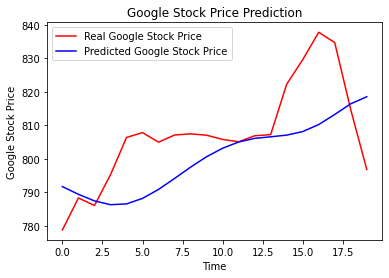

In [61]:
plt.plot(testing_set, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()